# BONUS LAB - Classification Evaluation Metrics
## Coder Name: Janojit Chakraborty
## Coder Registration Number: 21112011

### Objective
- To Understand the logic behind different Evaluation Metrics of Binary Classification

### Problem Definition
Create user defined functions for creating the following for a binary classification problem, when y_pred and y_test is given -

1. Confusion Matrix
2. Accuracy Score
3. Precision
4. Recall
5. F1 Score
6. Plotting points on a AUC Curve

### Approach/Methods:
- Use User-Defined functions
- Implementing looping concept

### Learnings & Reflection:
- Enhance logic building capability
- Get background knowledge about statistical measures and evaluation metrices

Name: **Janojit Chakraborty** <br>
Reg No: **21112011** <br>
Class: **4 BSC DS** <br>

---------------


| Assignment | Status |
| --- | --- |
|  1  | __Completed__ |
|  2  | __Completed__ |
|  3  | __Completed__ |
|  4  | __Completed__ |
|  5  | __Completed__ |
|  6  | __Not Completed__ |

In [1]:
import warnings
warnings.filterwarnings("ignore")

import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(columns = ['Actual','Predicted'])

count = int(input("Enter Number Of Entries: "))

for i in range(0,count):
    newRow = {}
    newRow['Actual'] = random.randint(0,1)
    newRow['Predicted'] = random.randint(0,1)
    df = df.append(newRow,ignore_index=True)
    
df['Actual'] = df['Actual'].astype('int64')
df['Predicted'] = df['Predicted'].astype('int64')

df

Enter Number Of Entries: 70


,Actual,Predicted
0,0,0
1,1,1
2,0,1
3,1,1
4,1,0
...,...,...
65,0,1
66,0,1
67,0,1
68,0,1


In [3]:
def confusion_matrix(actual,predicted):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(actual)):
        if (actual[i] == 1) and (predicted[i] == 1):
            TP += 1
    for i in range(len(actual)):
        if (actual[i] == 0) and (predicted[i] == 0):
            TN += 1
    for i in range(len(actual)):
        if (actual[i] == 0) and (predicted[i] == 1):
            FP += 1
    for i in range(len(actual)):
        if (actual[i] == 1) and (predicted[i] == 0):
            FN += 1
    return [[TN, FP],[FN,TP]]

In [4]:
def accuracy(actual,predicted):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(actual)):
        if (actual[i] == 1) and (predicted[i] == 1):
            TP += 1
    for i in range(len(actual)):
        if (actual[i] == 0) and (predicted[i] == 0):
            TN += 1
    for i in range(len(actual)):
        if (actual[i] == 0) and (predicted[i] == 1):
            FP += 1
    for i in range(len(actual)):
        if (actual[i] == 1) and (predicted[i] == 0):
            FN += 1
    return (TP+TN)/(TP+TN+FP+FN)

In [5]:
def precision(actual,predicted):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(actual)):
        if (actual[i] == 1) and (predicted[i] == 1):
            TP += 1
    for i in range(len(actual)):
        if (actual[i] == 0) and (predicted[i] == 0):
            TN += 1
    for i in range(len(actual)):
        if (actual[i] == 0) and (predicted[i] == 1):
            FP += 1
    for i in range(len(actual)):
        if (actual[i] == 1) and (predicted[i] == 0):
            FN += 1
    return TP/(TP+FP)

In [6]:
def recall(actual,predicted):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(actual)):
        if (actual[i] == 1) and (predicted[i] == 1):
            TP += 1
    for i in range(len(actual)):
        if (actual[i] == 0) and (predicted[i] == 0):
            TN += 1
    for i in range(len(actual)):
        if (actual[i] == 0) and (predicted[i] == 1):
            FP += 1
    for i in range(len(actual)):
        if (actual[i] == 1) and (predicted[i] == 0):
            FN += 1
    return TP/(TP+FN)

In [7]:
def f1_score(actual,predicted):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(actual)):
        if (actual[i] == 1) and (predicted[i] == 1):
            TP += 1
    for i in range(len(actual)):
        if (actual[i] == 0) and (predicted[i] == 0):
            TN += 1
    for i in range(len(actual)):
        if (actual[i] == 0) and (predicted[i] == 1):
            FP += 1
    for i in range(len(actual)):
        if (actual[i] == 1) and (predicted[i] == 0):
            FN += 1
    precision = (TP/(TP+FP))
    recall = (TP/(TP+FN))
    return (2*precision*recall)/(precision+recall)

In [8]:
def roc_curve_custom(actual,predicted):
    n = len(actual)
    fpr = []
    tpr = []
    thresholds = sorted(list(set(predicted)), reverse=True)

    for threshold in thresholds:
        tp = 0
        fp = 0
        tn = 0
        fn = 0

        for i in range(n):
            if predicted[i] >= threshold:
                if actual[i] == 1:
                    tp += 1
                else:
                    fp += 1
            else:
                if actual[i] == 1:
                    fn += 1
                else:
                    tn += 1

        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))

    return fpr, tpr, thresholds

In [9]:
def auc_custom(actual,predicted):
    n = len(actual)
    s = 0.0

    for i in range(n):
        for j in range(n):
            if actual[i] == 1 and actual[j] == 0:
                if predicted[i] > predicted[j]:
                    s += 1
                elif predicted[i] == predicted[j]:
                    s += 0.5

    return s / (sum(actual) * (n - sum(actual)))


### Using User-Defined Function

In [10]:
print("Accuracy Using User-Defined Function: ",accuracy(df['Actual'],df['Predicted']))
print("F1 score Using User-Defined Function: ",f1_score(df['Actual'],df['Predicted']))
print("Recall Using User-Defined Function: ",recall(df['Actual'],df['Predicted']))
print("Precision Using User-Defined Function: ",precision(df['Actual'],df['Predicted']))
print("Confussion Matrix Using User-Defined Function: ",confusion_matrix(df['Actual'],df['Predicted']))

Accuracy Using User-Defined Function:  0.5571428571428572
F1 score Using User-Defined Function:  0.5373134328358208
Recall Using User-Defined Function:  0.6206896551724138
Precision Using User-Defined Function:  0.47368421052631576
Confussion Matrix Using User-Defined Function:  [[21, 20], [11, 18]]


### Using Sklearn

In [11]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

In [12]:
print('Accuracy Using Sklearn:', accuracy_score(df['Actual'],df['Predicted']))
print('F1 score Using Sklearn:', f1_score(df['Actual'],df['Predicted']))
print('Recall Using Sklearn:', recall_score(df['Actual'],df['Predicted']))
print('Precision Using Sklearn:', precision_score(df['Actual'],df['Predicted']))
print('Confussion Matrix Using Sklearn:',confusion_matrix(df['Actual'],df['Predicted']))

Accuracy Using Sklearn: 0.5571428571428572
F1 score Using Sklearn: 0.5373134328358208
Recall Using Sklearn: 0.6206896551724138
Precision Using Sklearn: 0.47368421052631576
Confussion Matrix Using Sklearn: [[21 20]
 [11 18]]


### Using User-Defined Function

In [13]:
def plot_auc_curve(actual, predicted):
    fpr, tpr, thresholds = roc_curve_custom(actual, predicted)
    roc_auc = auc_custom(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

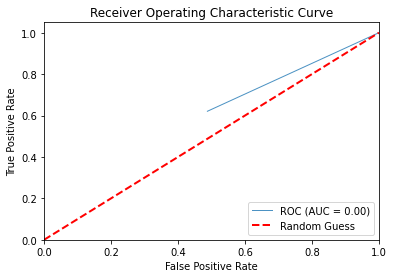

In [14]:
plot_auc_curve(df['Actual'],df['Predicted'])

### Using Sklearn

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_auc_curve1(actual, predicted):
    fpr, tpr, thresholds = roc_curve(actual, predicted)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

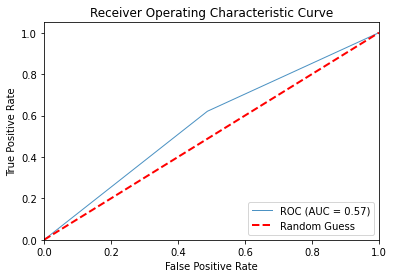

In [16]:
plot_auc_curve1(df['Actual'],df['Predicted'])